<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine/blob/main/WOMAC_Reg_Version_200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/KOA_EMG_WOMAC__2022.08.22_Final_W-tempo-spatial.csv")


In [57]:
dataset.head(10)

,Patient ID,WOMAC_total,WOMAC Severity,CCI_TA-RF,CCI_G-MH,CCI_TA-MH,CCI_G-RF,CCI_TA-G,CCI_MH-RF,CCI_L-H,...,Lyapunov_TIBIALIS ANT,Stance_CCI_TA-RF,Stance_CCI_G-MH,Stance_CCI_TA-G,Swing_CCI_TA-RF,Swing_CCI_G-MH,Swing_CCI_TA-G,swing/stance_cci(TA_RF),swing/stance_cci(G-MH),swing/stance_CCI(TA-G)
0,10193,40,Moderate,144.9,66.0,108.1,86.2,171.7,87.1,183.8,...,0.40,115.016739,82.560104,129.779021,212.427472,35.934817,266.326016,1.846927,0.435256,2.052150
1,10193,42,Moderate,99.1,123.6,98.9,123.6,109.4,145.9,215.6,...,0.30,80.799114,118.800065,87.596328,120.058278,131.061267,145.432434,1.485886,1.103209,1.660257
2,11407,42,Moderate,90.4,160.1,80.7,164.8,88.5,110.4,217.2,...,0.20,64.522568,185.837798,53.250781,118.951867,119.206854,144.415087,1.843570,0.641456,2.711981
3,11407,41,Moderate,146.6,196.2,136.4,184.8,123.0,106.3,293.3,...,0.30,157.259039,213.969267,126.550560,134.834096,168.262739,117.370956,0.857401,0.786387,0.927463
4,12435,23,Mild,147.9,153.5,85.9,305.4,90.3,40.4,268.2,...,0.30,158.726742,198.202890,94.353370,135.926913,82.676272,83.944362,0.856358,0.417129,0.889681
5,12435,47,Moderate,99.4,55.4,93.6,58.7,150.9,108.4,145.9,...,0.30,147.257611,72.130138,197.046837,48.532762,29.851684,80.509844,0.329577,0.413859,0.408582
6,12521,19,Mild,90.0,91.0,92.0,88.7,115.0,136.7,174.1,...,0.40,86.971580,107.723821,106.343048,93.422362,64.138358,128.642708,1.074171,0.595396,1.209696
7,12521,53,Moderate,133.5,93.6,121.1,100.7,146.5,100.4,214.5,...,0.30,112.746870,109.750454,131.151480,156.402708,68.811402,170.867378,1.387202,0.626981,1.302825
8,12687,74,Severe,193.3,130.3,207.0,129.6,162.9,140.1,295.2,...,0.31,223.637121,142.868454,166.702324,155.574614,109.404210,155.958741,0.695656,0.765769,0.935552
9,12687,74,Severe,129.5,115.1,88.9,180.9,103.8,79.0,229.5,...,0.30,139.496753,123.489941,101.890803,118.112704,102.404559,106.992896,0.846706,0.829254,1.050074


In [58]:
dataset.shape

(150, 87)

In [59]:
X = dataset.iloc[:,3:]
y = dataset.iloc[:, 1]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


In [62]:
print(y_pred.shape)

(30,)


In [63]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

-3.2229507667144723

In [64]:
r_sq = lin_reg.score(X, y)
print(r_sq)

-0.21246213972070427


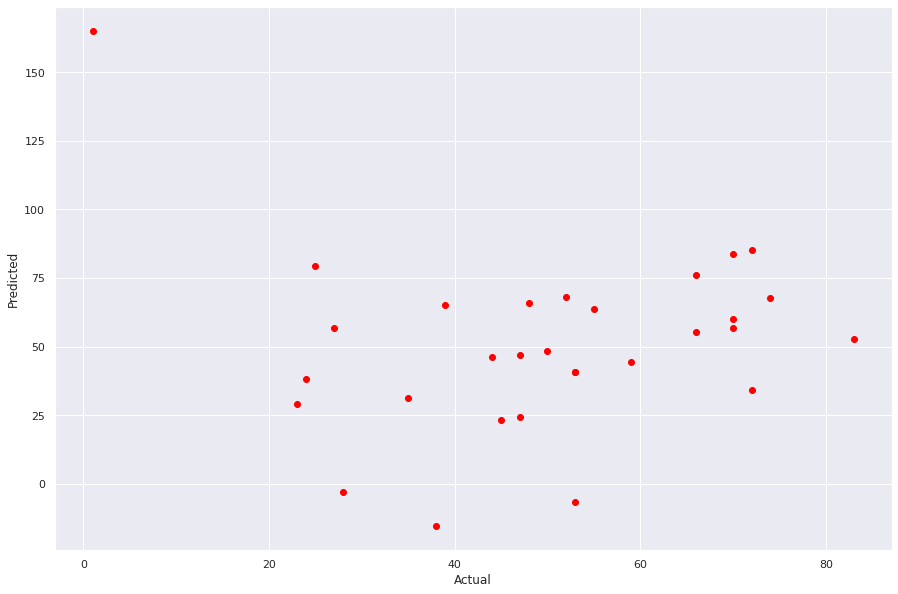

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [66]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_test,
        "Predicted Value":y_pred,
        "Difference":y_test-y_pred
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
114,39,65.233519,-26.233519
62,50,48.426450,1.573550
33,59,44.505246,14.494754
107,35,31.233082,3.766918
7,53,40.857177,12.142823
100,47,24.426368,22.573632
40,72,85.262328,-13.262328
86,53,40.600565,12.399435
76,72,34.208940,37.791060
71,27,56.729162,-29.729162


In [67]:
# The coefficients
print("Coefficients: \n", lin_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [0.745741 0.043803 0.041458 -0.035532 -1.341240 -0.055975 0.086170
 -0.200939 -0.157412 1.156769 -0.342394 -2.073057 67.673645 -6.866082
 -1.898068 -4.869184 56.036273 -1.898068 -3.934234 56.036273 106.287650
 2.041575 0.362947 -2.622423 1.461746 0.057689 0.057359 0.036775 0.127545
 0.070280 0.046322 -0.038280 0.310042 0.012591 -0.011037 -0.075055
 0.182497 -125.431508 728.431058 1846.146482 992.237677 -1307.455364
 -1764.917757 470.424144 434.142199 -1273.580935 68.954092 -475.836420
 -206.141593 338.647107 -371.429526 -342.410275 196.976086 -149.166566
 940.394831 5.545335 8.179720 0.856380 -19.927624 -16.242233 -12.270792
 43.273027 -24.303719 1.192128 -0.788952 -11.098277 6.178315 2.322192
 0.974863 -2.045203 1.654715 34.540356 -27.262986 -49.941693 -1.194102
 -0.416395 -0.118166 0.898435 -0.362769 -0.096443 0.494458 2.868335
 1.406217 4.162823]
Mean squared error: 1477.32
Coefficient of determination: -3.22


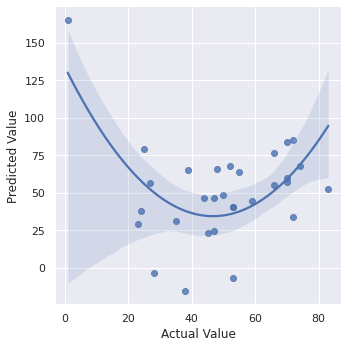

In [68]:
import seaborn as sns


scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)

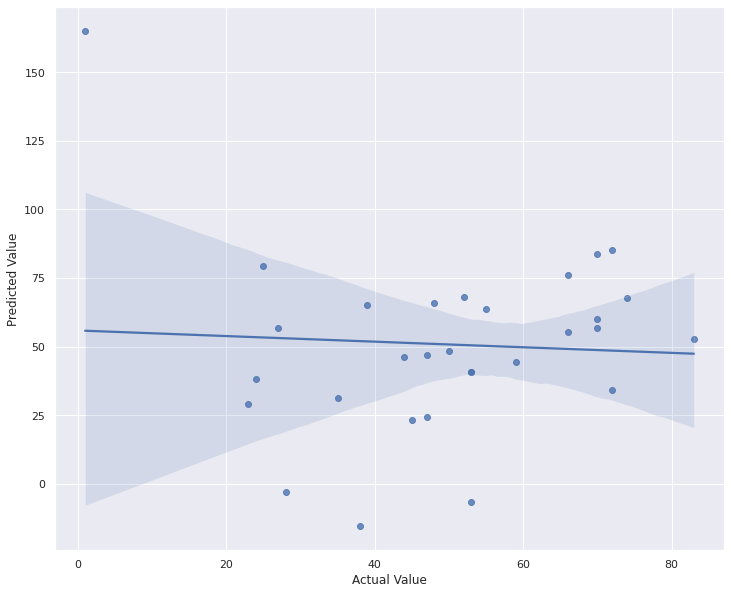

In [69]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);

In [70]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline


np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})



In [71]:
raw_data = pd.read_csv("/content/drive/MyDrive/Iqram Sir/Latest/KOA_EMG_WOMAC__2022.08.16_Final_WO-tempo-spatial.csv")

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(150, 785)


,Patient ID,WOMAC_total,WOMAC Severity,CCI_TA-RF,CCI_G-MH,CCI_TA-MH,CCI_G-RF,CCI_TA-G,CCI_MH-RF,CCI_L-H,...,TA-G-100,Stance_CCI_TA-RF,Stance_CCI_G-MH,Stance_CCI_TA-G,Swing_CCI_TA-RF,Swing_CCI_G-MH,Swing_CCI_TA-G,swing/stance_cci(TA_RF),swing/stance_cci(G-MH),swing/stance_CCI(TA-G)
0,10193,40,Moderate,144.9,66.0,108.1,86.2,171.7,87.1,183.8,...,234.689409,115.016739,82.560104,129.779021,212.427472,35.934817,266.326016,1.846927,0.435256,2.052150
1,10193,42,Moderate,99.1,123.6,98.9,123.6,109.4,145.9,215.6,...,130.854095,80.799114,118.800065,87.596328,120.058278,131.061267,145.432434,1.485886,1.103209,1.660257
2,11407,42,Moderate,90.4,160.1,80.7,164.8,88.5,110.4,217.2,...,109.781099,64.522568,185.837798,53.250781,118.951867,119.206854,144.415087,1.843570,0.641456,2.711981
3,11407,41,Moderate,146.6,196.2,136.4,184.8,123.0,106.3,293.3,...,117.902928,157.259039,213.969267,126.550560,134.834096,168.262739,117.370956,0.857401,0.786387,0.927463
4,12435,23,Mild,147.9,153.5,85.9,305.4,90.3,40.4,268.2,...,76.648348,158.726742,198.202890,94.353370,135.926913,82.676272,83.944362,0.856358,0.417129,0.889681


In [72]:
# Checking for null values

raw_data.isnull().sum()

Patient ID                 0
WOMAC_total                0
WOMAC Severity             0
CCI_TA-RF                  0
CCI_G-MH                   0
                          ..
Swing_CCI_G-MH             0
Swing_CCI_TA-G             0
swing/stance_cci(TA_RF)    0
swing/stance_cci(G-MH)     0
swing/stance_CCI(TA-G)     0
Length: 785, dtype: int64

In [73]:
# Investigate all the elements whithin each Feature 
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Patient ID :89
The number of values for feature WOMAC_total :55
The number of values for feature WOMAC Severity :3 -- ['Mild' 'Moderate' 'Severe']
The number of values for feature CCI_TA-RF :147
The number of values for feature CCI_G-MH :144
The number of values for feature CCI_TA-MH :146
The number of values for feature CCI_G-RF :140
The number of values for feature CCI_TA-G :144
The number of values for feature CCI_MH-RF :148
The number of values for feature CCI_L-H :144
The number of values for feature CCI_F-B :148
The number of values for feature  Max_RECTUS :1 -- [100]
The number of values for feature  Max_MEDIAL HAM :1 -- [100]
The number of values for feature  Max_GASTROCNEMIUS :1 -- [100]
The number of values for feature  Max_TIBIALIS ANT :1 -- [100]
The number of values for feature  Min_RECTUS :139
The number of values for feature  Min_MEDIAL HAM :141
The number of values for feature  Min_GASTROCNEMIUS :133
The number of values for feature  Min

In [74]:
# Visualize the data using seaborn Pairplots

#g = sns.pairplot(raw_data)

# Notes: Do not run this on a big dataset. Filter the columns first

In [75]:
raw_data.columns

Index(['Patient ID', 'WOMAC_total', 'WOMAC Severity', 'CCI_TA-RF', 'CCI_G-MH',
       'CCI_TA-MH', 'CCI_G-RF', 'CCI_TA-G', 'CCI_MH-RF', 'CCI_L-H',
       ...
       'TA-G-100', 'Stance_CCI_TA-RF', 'Stance_CCI_G-MH', 'Stance_CCI_TA-G',
       'Swing_CCI_TA-RF', 'Swing_CCI_G-MH', 'Swing_CCI_TA-G',
       'swing/stance_cci(TA_RF)', 'swing/stance_cci(G-MH)',
       'swing/stance_CCI(TA-G)'],
      dtype='object', length=785)

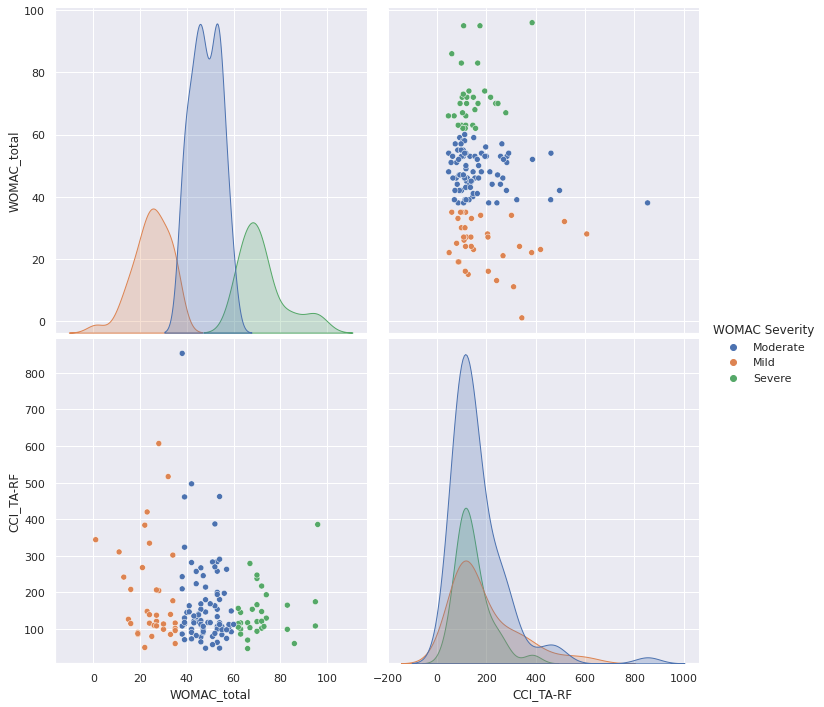

In [76]:
# Visualising a Subset of our data - important features

g = sns.pairplot(raw_data[['WOMAC Severity', 'WOMAC_total', 'CCI_TA-RF']], hue = 'WOMAC Severity', height = 5)

In [77]:
# Visualising a Subset of our data - important features

'''g = sns.lmplot(x = 'Marketing Spend', y = 'Revenue', data = raw_data, col = 'Day_Name', col_wrap = 3, height = 5, 
              scatter_kws = {'color':'green'}, ci = False)'''

"g = sns.lmplot(x = 'Marketing Spend', y = 'Revenue', data = raw_data, col = 'Day_Name', col_wrap = 3, height = 5, \n              scatter_kws = {'color':'green'}, ci = False)"

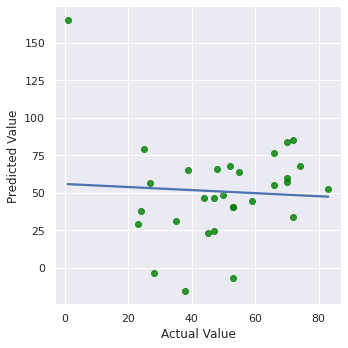

In [78]:
# Visualising a Subset of our data - important features

g = sns.lmplot(x="Actual Value", y="Predicted Value", data = pred_y_df, height = 5, 
              scatter_kws = {'color':'green'}, ci = False)

In [79]:
lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
# SK-Learn official doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [80]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy n2  on the training dataset is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
#print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)


# R2 Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# MAE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

The Accuracy  on the training dataset is:  0.688905733259865
The Accuracy n2  on the training dataset is:  0.688905733259865

The Accuracy  on the testing dataset is:  -3.2229507667144723

The RMSE  on the training dataset is:  9.499589638095417
The RMSE  on the testing dataset is:  38.43597599976825

The MAE  on the training dataset is:  7.711270351868264
The MAE  on the testing dataset is:  23.88932410979311


Intercept:  -10515.894225036884


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

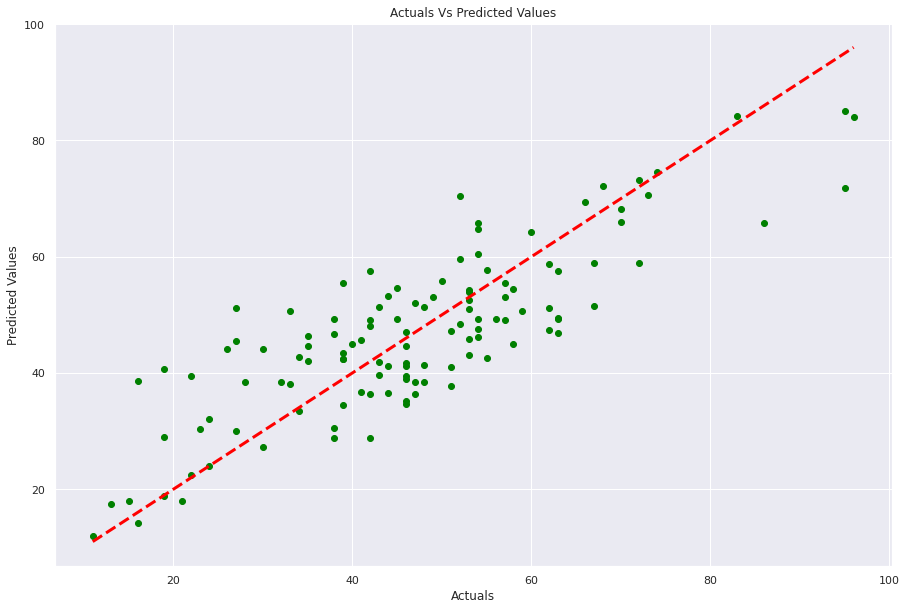

In [81]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Actuals Vs Residuals')

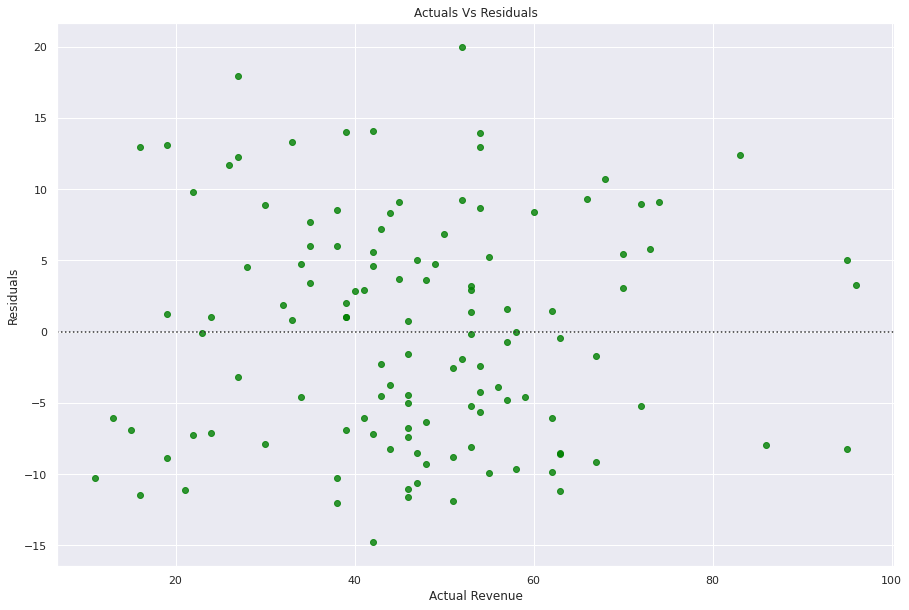

In [82]:
# Ploting Residuals

plt.figure(figsize=(15,10))

sns.residplot(y_train, y_pred, color='green')
plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')